## THIS STUDIES DATA BEFORE CAMPA_18 DAY 587

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.cluster import KMeans

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
dir_path = '~/Documents/DATA_SCIENCE/Kroger_Retail_Dunnhumby/The-Complete-Journey/data/'

file1= dir_path + 'transaction_data.csv'
file2 = dir_path + 'hh_demographic.csv'
file3 = dir_path + 'coupon_redempt.csv'
file4= dir_path + 'coupon.csv'
file5 = dir_path + 'campaign_desc.csv'
file6 = dir_path + 'campaign_table.csv'
file7= dir_path + 'causal_data.csv'
file8 = dir_path + 'product.csv'


In [3]:
def load_data(filename):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.lower()
    return df
    

In [17]:
# import data into dataframe
df_trans_full = load_data(file1)
df_cus = load_data(file2)
df_coupon_redempt_full = load_data(file3)
df_coupon_full = load_data(file4)
# df_camp_des = load_data(file5)
df_camp_cus_full = load_data(file6)
# df_prod_causal = load_data(file7)
df_prod = load_data(file8)
df_campaign_detail = pd.read_csv('DATA_CLEAN/campaign_details.csv')
df_camp_des = df_campaign_detail

In [18]:
print('Total trans', df_trans_full.shape)
df_trans = df_trans_full[df_trans_full.day<587]
print('Total trans before day 587', df_trans.shape)

Total trans (2595732, 12)
Total trans before day 587 (2077756, 12)


In [19]:
print('Total redemption', df_coupon_redempt_full.shape)
df_coupon_redempt = df_coupon_redempt_full.query('campaign<18 or campaign>25')
print('Total redemption before day 587', df_coupon_redempt.shape)

Total redemption (2318, 4)
Total redemption before day 587 (1420, 4)


In [20]:
print('Total coupons', df_coupon_full.shape)
df_coupon = df_coupon_full.query('campaign<18 or campaign>25')
print('Total coupons before day 587', df_coupon.shape)

Total coupons (124548, 3)
Total coupons before day 587 (78221, 3)


In [21]:
print('Total camps cus records', df_camp_cus_full.shape)
df_camp_cus = df_camp_cus_full.query('campaign<18 or campaign>25')
print('Total camps cus records before day 587', df_camp_cus.shape)

Total camps cus records (7208, 3)
Total camps cus records before day 587 (4890, 3)


In [22]:
arr_cus_unique = df_trans.household_key.unique()
print('Total households',len(arr_cus_unique))

# get customers receiving campaigns before day 587 (not receiving campaigns from 18 - 25)
arr_cus_camp = df_camp_cus.household_key.unique()
print('Households received campaigns',len(arr_cus_camp))

arr_cus_no_camp = set(arr_cus_unique)-set(arr_cus_camp)
print('Households did not receive campaigns',len(arr_cus_no_camp))

arr_cus_redempt = df_coupon_redempt.household_key.unique()
print('Households redeemed coupons',len(arr_cus_redempt))

arr_cus_no_redempt = set(arr_cus_camp)-set(arr_cus_redempt)
print('Households received coupons but did not redeem',len(arr_cus_no_redempt))


Total households 2498
Households received campaigns 1460
Households did not receive campaigns 1038
Households redeemed coupons 346
Households received coupons but did not redeem 1114


### Create household table with comprehensive details

In [115]:
# create household table with comprehensive details

df_household = pd.DataFrame(df_trans.sort_values('household_key').household_key.unique())
df_household.columns = ['household_key']

df_household = df_household.merge(df_cus,on='household_key')
df_household



,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
...,...,...,...,...,...,...,...,...
796,2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
797,2496,45-54,A,75-99K,Homeowner,Unknown,3,1
798,2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown
799,2498,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown


In [116]:

# calculate total campaigns and coupons received
df_household['received_campaign'] = 0
df_household.loc[df_household.household_key.isin(arr_cus_camp),'received_campaign'] = 1
# df_household

df_household['redeemed_coupons'] = 0
df_household.loc[df_household.household_key.isin(arr_cus_redempt),'redeemed_coupons'] = 1

total_camps = df_camp_cus.groupby(['household_key']).count().reset_index()
total_camps = total_camps[['household_key','campaign']].rename(columns={'campaign':'total_campaigns_received'})
# total_camps

df_household = df_household.merge(total_camps,how='left',on='household_key')
df_household

,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
796,2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,1.0
797,2496,45-54,A,75-99K,Homeowner,Unknown,3,1,1,1,4.0
798,2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,1,0,2.0
799,2498,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,5.0


In [117]:
# calculate campaigns received of each types
total_camp_types = df_camp_cus.groupby(['household_key','description']).count()
camp_types = total_camp_types.unstack(level=-1)
# camp_types
camp_types.columns = ['TypeA','TypeB','TypeC']

df_household = df_household.merge(camp_types,how='left',on='household_key')
# df_household

total_camp_engaged = df_coupon_redempt.groupby(['household_key']).campaign.count().reset_index()
df_household = df_household.merge(total_camp_engaged,how='left',on='household_key')

df_household.rename(columns={'campaign':'total_campaigns_engaged'},inplace=True)
df_household.fillna(0,inplace=True)
df_household.head()



,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0,2.0,2.0,0.0,3.0
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0,0.0,3.0,0.0,0.0
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0,2.0,6.0,0.0,1.0
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0,2.0,4.0,0.0,11.0
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0,1.0,1.0,0.0,0.0


In [118]:
# Total coupons received for each household

total_coupons_received = df_camp_cus.merge(df_camp_des[['campaign','coupons_giveout']],how='left',on='campaign')
total_coupons_received = total_coupons_received.groupby('household_key').agg({'coupons_giveout':'sum'}).reset_index()
# total_coupons_received

df_household = df_household.merge(total_coupons_received,how='left',on='household_key')
df_household.fillna(0,inplace=True)
# df_household

df_household.rename(columns={'coupons_giveout':'total_coupons_received'},inplace=True)
df_household


,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0,2.0,2.0,0.0,3.0,80.0
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0,0.0,3.0,0.0,0.0,45.0
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0,2.0,6.0,0.0,1.0,136.0
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0,2.0,4.0,0.0,11.0,82.0
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0,1.0,1.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,1.0,0.0,1.0,0.0,0.0,19.0
797,2496,45-54,A,75-99K,Homeowner,Unknown,3,1,1,1,4.0,2.0,1.0,1.0,4.0,77.0
798,2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,1,0,2.0,2.0,0.0,0.0,0.0,32.0
799,2498,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,5.0,2.0,2.0,1.0,0.0,65.0


In [119]:
# Total coupons redeemed for each household

total_coupons_redempt = df_coupon_redempt.groupby(['household_key']).coupon_upc.count().reset_index()
df_household = df_household.merge(total_coupons_redempt,how='left',on='household_key')
df_household.fillna(0,inplace=True)

df_household.rename(columns={'coupon_upc':'total_coupons_redeemed'},inplace=True)
df_household.head()



,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0


In [120]:
# Conversion rate for each household

df_household['camp_conversion_rate'] = round(df_household.total_campaigns_engaged / df_household.total_campaigns_received,2)

df_household['coupon_conversion_rate'] = round(df_household.total_coupons_redeemed / df_household.total_coupons_received,2)

df_household

,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00
797,2496,45-54,A,75-99K,Homeowner,Unknown,3,1,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05
798,2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00
799,2498,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00


In [121]:
# calculate revenue

df_revenue = df_trans.groupby('household_key').sales_value.sum().reset_index()
df_revenue = df_revenue.rename(columns={'sales_value':'revenue'})
df_household = df_household.merge(df_revenue,on='household_key')

# calculate frequency

df_frequency = df_trans.groupby(['household_key','basket_id']).day.count().reset_index().drop(columns=['day'])
df_frequency = df_frequency.groupby('household_key').basket_id.count().reset_index()
df_frequency = df_frequency.rename(columns={'basket_id':'frequency'})
df_household = df_household.merge(df_frequency,on='household_key')

# calculate recency
 
df_max_purchase = df_trans.groupby('household_key').day.max().reset_index()
df_max_purchase.columns=['household_key','max_shop_day']
df_max_purchase['recency'] = df_max_purchase.max_shop_day.max() - df_max_purchase.max_shop_day
df_household = df_household.merge(df_max_purchase[['household_key','recency']],on='household_key')

df_household


,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,67,5
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,38,10
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,90,0
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,207,0
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,92,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,26,14
797,2496,45-54,A,75-99K,Homeowner,Unknown,3,1,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,53,7
798,2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,183,3
799,2498,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,130,1


In [122]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [123]:
#clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_household[['recency']])
df_household['recency_cluster'] = kmeans.predict(df_household[['recency']])
df_household




,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency,recency_cluster
0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,67,5,3
1,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,38,10,0
2,8,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,90,0,1
3,13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,207,0,1
4,16,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,92,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,26,14,0
797,2496,45-54,A,75-99K,Homeowner,Unknown,3,1,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,53,7,3
798,2497,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,183,3,1
799,2498,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,130,1,1


In [124]:
df_household.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,77.0,13.207792,2.477996,10.0,11.0,13.0,15.0,18.0
1,493.0,1.008114,1.037868,0.0,0.0,1.0,2.0,3.0
2,16.0,23.750000,4.343578,19.0,20.0,22.0,27.0,32.0
3,215.0,6.009302,1.646267,4.0,4.0,6.0,7.0,9.0


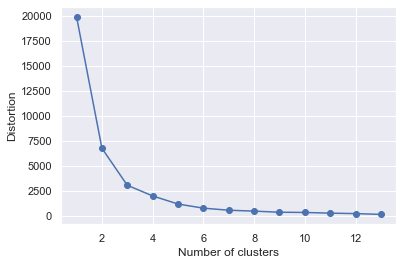

In [125]:
X = df_household[['recency']]

inertiaList = []
for i in range(1, 14):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    inertiaList.append(km.inertia_)

# plot
plt.plot(range(1, 14), inertiaList, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:

df_household = order_cluster('recency_cluster', 'recency',df_household,False)
df_household.groupby('recency_cluster')['recency'].describe()
df_household

In [111]:

#clustering for Frequency

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_household[['frequency']])
df_household['frequency_cluster'] = kmeans.predict(df_household[['frequency']])
# df_cus

df_household = order_cluster('frequency_cluster', 'frequency',df_household,True)
df_household.groupby('frequency_cluster')['frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,1580.0,40.032278,23.264993,1.0,22.0,37.0,58.0,87.0
1,752.0,134.972074,36.967766,88.0,104.0,126.5,161.0,227.0
2,151.0,319.450331,77.912916,228.0,260.5,291.0,368.5,538.0
3,15.0,761.133333,195.886216,564.0,606.5,691.0,910.5,1159.0


In [112]:
# clustering for Revenue

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_household[['revenue']])
df_household['revenue_cluster'] = kmeans.predict(df_household[['revenue']])
# df_household

df_household = order_cluster('revenue_cluster', 'revenue',df_household,True)
df_household.groupby('revenue_cluster')['revenue'].describe()



,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,1415.0,906.206304,569.460969,3.55,401.8650,846.170,1370.1500,2019.63
1,695.0,3134.996345,779.805841,2027.48,2435.0800,3043.670,3785.6200,4702.70
2,294.0,6273.594966,1132.421174,4737.10,5285.9725,6063.915,6988.6475,8975.58
3,94.0,11789.983511,3099.432426,9060.00,10123.6200,10690.105,12448.8950,29140.95


In [113]:
# translating RFM score

df_household['rfm_score'] = df_household.recency_cluster + df_household.frequency_cluster + df_household.revenue_cluster

df_household['segment'] = 'Low-value'
df_household.loc[df_household.rfm_score > 3,'segment'] = 'Mid-value'
df_household.loc[df_household.rfm_score > 6,'segment'] = 'High-value'
df_household

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,67,5,3,0,1,4,Mid-value
1,3,1,0,3.0,2.0,0.0,1.0,0.0,58.0,0.0,0.00,0.00,2554.98,44,10,3,0,1,4,Mid-value
2,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,38,10,3,0,1,4,Mid-value
3,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,76,6,3,0,1,4,Mid-value
4,31,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2551.47,36,1,3,0,1,4,Mid-value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,1228,1,1,4.0,3.0,1.0,0.0,3.0,61.0,3.0,0.75,0.05,11307.06,606,0,3,3,3,9,High-value
2494,1453,1,1,7.0,2.0,3.0,2.0,8.0,126.0,8.0,1.14,0.06,16450.41,564,1,3,3,3,9,High-value
2495,1901,1,0,6.0,2.0,3.0,1.0,0.0,103.0,0.0,0.00,0.00,9707.61,725,0,3,3,3,9,High-value
2496,2337,1,0,5.0,2.0,2.0,1.0,0.0,85.0,0.0,0.00,0.00,10782.30,1159,9,3,3,3,9,High-value


In [34]:
# Calculate total spend of each household for top 6 most-purchased product categories

product_category_list = ['GROCERY','DELI','PRODUCE','KIOSK-GAS','DRUG GM','NUTRITION','SALAD BAR','MEAT']

for c in product_category_list:
    # print(c)
    arr_prod_id = df_prod[df_prod.department==c]['product_id']
    df_total_spend = df_trans[df_trans.product_id.isin(arr_prod_id)].groupby('household_key').sales_value.sum().reset_index()
    new_name = c + '_spend'
    df_total_spend.rename(columns={'sales_value':new_name},inplace=True)
    df_household = df_household.merge(df_total_spend,how='left',on='household_key')



In [114]:
df_household_demo = df_household.merge(df_cus,on='household_key')
df_household_demo.fillna(0,inplace=True)
df_household_demo

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,67,5,3,0,1,4,Mid-value,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,38,10,3,0,1,4,Mid-value,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,76,6,3,0,1,4,Mid-value,35-44,U,50-74K,Unknown,Unknown,1,None/Unknown
3,31,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2551.47,36,1,3,0,1,4,Mid-value,35-44,B,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
4,39,1,0,4.0,4.0,0.0,0.0,0.0,64.0,0.0,0.00,0.00,4175.06,51,13,3,0,1,4,Mid-value,35-44,A,125-149K,Homeowner,2 Adults No Kids,2,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,900,1,0,5.0,2.0,3.0,0.0,0.0,64.0,0.0,0.00,0.00,13185.08,994,0,3,3,3,9,High-value,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
797,1228,1,1,4.0,3.0,1.0,0.0,3.0,61.0,3.0,0.75,0.05,11307.06,606,0,3,3,3,9,High-value,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown
798,1453,1,1,7.0,2.0,3.0,2.0,8.0,126.0,8.0,1.14,0.06,16450.41,564,1,3,3,3,9,High-value,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1
799,1901,1,0,6.0,2.0,3.0,1.0,0.0,103.0,0.0,0.00,0.00,9707.61,725,0,3,3,3,9,High-value,45-54,U,35-49K,Homeowner,2 Adults Kids,3,1


In [ ]:
df_household_demo.to_csv('DATA_CLEAN/households_beforeCamp18.csv')


In [38]:
df_campaign_detail

,description,campaign,start_day,end_day,duration,total_coupons,coupons_giveout
0,TypeA,26,224,264,40,181,16
1,TypeC,27,237,300,63,27,27
2,TypeB,28,259,320,61,28,28
3,TypeB,29,281,334,53,33,33
4,TypeA,30,323,369,46,181,16
5,TypeB,1,346,383,37,11,11
6,TypeB,2,351,383,32,16,16
7,TypeC,3,356,412,56,34,34
8,TypeB,4,372,404,32,12,12
9,TypeB,5,377,411,34,11,11


In [39]:
df_camp_cus

,description,household_key,campaign
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26
...,...,...,...
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15


In [40]:
# Get customers who got campaign A offer and converted
df_campA_cus = df_camp_cus[df_camp_cus.description=='TypeA']['household_key'].reset_index()
df_campA_cus

,index,household_key
0,0,17
1,1,27
2,2,212
3,3,208
4,4,192
...,...,...
2841,2841,55
2842,2842,95
2843,2843,14
2844,2844,13


In [41]:
arr_campA_id = df_campaign_detail[df_campaign_detail.description=='TypeA'].campaign.unique()
arr_campA_id
arr_campB_id = df_campaign_detail[df_campaign_detail.description=='TypeB'].campaign.unique()
arr_campB_id
arr_campC_id = df_campaign_detail[df_campaign_detail.description=='TypeC'].campaign.unique()
arr_campC_id

array([27,  3,  6, 14, 15, 20])

In [42]:
# check if customers converted for each campaign A in 2 years

def get_camp_converted(data, camp_name_id_list, camp_type):
    for c in camp_name_id_list:
        arr_cus_id =  df_camp_cus[df_camp_cus.campaign==c]['household_key'].unique()
        col_name = camp_type + '_' + str(c) + '_converted'
        data[col_name] = 0
        data.loc[data.household_key.isin(arr_cus_id),col_name] = 1
    return data


In [43]:
camp_name_id_list_A = arr_campA_id # CampA
df = get_camp_converted(df_household_demo,camp_name_id_list_A,'campA')

camp_name_id_list_B = arr_campB_id # CampB
df = get_camp_converted(df_household_demo,camp_name_id_list_B,'campB')

camp_name_id_list_C = arr_campC_id # CampC
df = get_camp_converted(df_household_demo,camp_name_id_list_C,'campC')

df

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,2483,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,682.49,47,0,3,0,0,3,Low-value,440.50,17.68,55.45,0.00,106.24,0.00,0.00,7.46,45-54,B,75-99K,Homeowner,Single Male,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,593,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,474.06,45,0,3,0,0,3,Low-value,276.62,4.72,64.02,27.01,48.31,0.00,0.00,13.16,35-44,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2397,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,713.85,25,0,3,0,0,3,Low-value,402.19,72.24,45.91,0.00,94.13,2.08,0.00,7.24,65+,B,125-149K,Unknown,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1438,1,0,1.0,0.0,1.0,0.0,0.0,18.0,0.0,0.00,0.00,1796.58,37,11,3,0,0,3,Low-value,500.23,11.97,493.66,0.00,133.44,317.67,12.27,163.99,45-54,U,Under 15K,Unknown,Single Female,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,281,1,0,5.0,4.0,0.0,1.0,0.0,66.0,0.0,0.00,0.00,1302.50,72,7,3,0,0,3,Low-value,768.64,39.68,240.98,23.44,40.34,0.00,0.00,130.24,35-44,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1901,1,0,6.0,2.0,3.0,1.0,0.0,103.0,0.0,0.00,0.00,9707.61,725,0,3,3,3,9,High-value,4488.86,217.03,594.65,10.00,1942.70,141.06,128.81,670.76,45-54,U,35-49K,Homeowner,2 Adults Kids,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
797,900,1,0,5.0,2.0,3.0,0.0,0.0,64.0,0.0,0.00,0.00,13185.08,994,0,3,3,3,9,High-value,4550.80,816.53,487.56,2431.82,2680.25,54.75,119.87,568.30,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
798,232,1,1,4.0,2.0,2.0,0.0,1.0,58.0,1.0,0.25,0.02,12003.14,606,0,3,3,3,9,High-value,6259.75,265.27,483.49,1752.68,1927.15,47.64,22.45,563.87,35-44,U,35-49K,Unknown,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
799,1453,1,1,7.0,2.0,3.0,2.0,8.0,126.0,8.0,1.14,0.06,16450.41,564,1,3,3,3,9,High-value,6986.53,962.81,2236.66,0.00,2456.84,426.68,305.40,1211.62,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [44]:
# work out target groups of camp_A 18
arr_all_cus = df_trans_full.household_key.unique()
arr_cus_received_camp18 =  df_camp_cus_full[df_camp_cus_full.campaign==18]['household_key'].unique()
arr_cus_not_receive_camp18 = set(arr_all_cus) - set(arr_cus_received_camp18)
arr_cus_redeemed_camp18 =  df_coupon_redempt_full[df_coupon_redempt_full.campaign==18]['household_key'].unique()
arr_cus_not_redeemed_camp18 =  set(arr_cus_received_camp18)-set(arr_cus_redeemed_camp18)

print(f'total cus: {len(arr_all_cus)}')
print(f'total received camp 18: {len(arr_cus_received_camp18)}')
print(f'total not receive camp 18: {len(arr_cus_not_receive_camp18)}')
print(f'total redeemed camp 18: {len(arr_cus_redeemed_camp18)}')
print(f'total not redeemed camp 18: {len(arr_cus_not_redeemed_camp18)}')


total cus: 2500
total received camp 18: 1133
total not receive camp 18: 1367
total redeemed camp 18: 214
total not redeemed camp 18: 919


In [45]:
# get converted data of campA 18

df_household_demo.loc[df_household_demo.household_key.isin(arr_cus_redeemed_camp18),'campA_18_converted'] = 1
df_household_demo

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,2483,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,682.49,47,0,3,0,0,3,Low-value,440.50,17.68,55.45,0.00,106.24,0.00,0.00,7.46,45-54,B,75-99K,Homeowner,Single Male,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,593,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,474.06,45,0,3,0,0,3,Low-value,276.62,4.72,64.02,27.01,48.31,0.00,0.00,13.16,35-44,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2397,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,713.85,25,0,3,0,0,3,Low-value,402.19,72.24,45.91,0.00,94.13,2.08,0.00,7.24,65+,B,125-149K,Unknown,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1438,1,0,1.0,0.0,1.0,0.0,0.0,18.0,0.0,0.00,0.00,1796.58,37,11,3,0,0,3,Low-value,500.23,11.97,493.66,0.00,133.44,317.67,12.27,163.99,45-54,U,Under 15K,Unknown,Single Female,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,281,1,0,5.0,4.0,0.0,1.0,0.0,66.0,0.0,0.00,0.00,1302.50,72,7,3,0,0,3,Low-value,768.64,39.68,240.98,23.44,40.34,0.00,0.00,130.24,35-44,B,50-74K,Homeowner,Single Female,1,None/Unknown,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1901,1,0,6.0,2.0,3.0,1.0,0.0,103.0,0.0,0.00,0.00,9707.61,725,0,3,3,3,9,High-value,4488.86,217.03,594.65,10.00,1942.70,141.06,128.81,670.76,45-54,U,35-49K,Homeowner,2 Adults Kids,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
797,900,1,0,5.0,2.0,3.0,0.0,0.0,64.0,0.0,0.00,0.00,13185.08,994,0,3,3,3,9,High-value,4550.80,816.53,487.56,2431.82,2680.25,54.75,119.87,568.30,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
798,232,1,1,4.0,2.0,2.0,0.0,1.0,58.0,1.0,0.25,0.02,12003.14,606,0,3,3,3,9,High-value,6259.75,265.27,483.49,1752.68,1927.15,47.64,22.45,563.87,35-44,U,35-49K,Unknown,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
799,1453,1,1,7.0,2.0,3.0,2.0,8.0,126.0,8.0,1.14,0.06,16450.41,564,1,3,3,3,9,High-value,6986.53,962.81,2236.66,0.00,2456.84,426.68,305.40,1211.62,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [62]:
df_household_demo.to_csv('DATA_CLEAN/households_beforeCamp18.csv',index=False)

In [46]:
df_household_demo[df_household_demo.campA_18_converted==1]

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,frequency,recency,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
81,2282,1,0,1.0,0.0,1.0,0.0,0.0,33.0,0.0,0.00,0.00,813.35,57,3,3,0,0,3,Low-value,327.19,28.68,327.81,0.00,44.33,20.66,0.00,1.52,55-64,B,175-199K,Homeowner,Single Female,1,None/Unknown,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,26,14,3,0,0,3,Low-value,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
92,2324,1,1,8.0,4.0,3.0,1.0,4.0,130.0,4.0,0.50,0.03,1984.48,110,4,3,1,0,4,Mid-value,1085.76,98.33,101.53,37.65,384.89,35.80,0.00,79.51,35-44,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
106,1928,1,0,4.0,3.0,1.0,0.0,0.0,66.0,0.0,0.00,0.00,2002.95,97,5,3,1,0,4,Mid-value,1187.78,28.29,83.38,201.54,256.90,0.00,0.00,0.00,35-44,B,75-99K,Homeowner,2 Adults Kids,3,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124,460,1,0,3.0,2.0,1.0,0.0,0.0,44.0,0.0,0.00,0.00,628.76,101,0,3,1,0,4,Mid-value,239.42,14.43,90.86,97.58,84.40,57.56,0.00,3.02,65+,B,25-34K,Homeowner,Single Female,1,None/Unknown,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,1475,1,1,4.0,2.0,2.0,0.0,7.0,55.0,7.0,1.75,0.13,11294.59,268,0,3,2,3,8,High-value,5707.48,317.10,811.73,849.91,318.97,309.09,0.00,1789.46,25-34,B,50-74K,Homeowner,Single Male,1,None/Unknown,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
793,1823,1,1,4.0,2.0,0.0,2.0,15.0,59.0,15.0,3.75,0.25,9345.35,255,2,3,2,3,8,High-value,4346.78,489.44,820.26,1374.04,1185.77,8.88,9.68,657.58,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
794,718,1,1,10.0,3.0,5.0,2.0,4.0,179.0,4.0,0.40,0.02,16518.81,538,0,3,3,3,9,High-value,8563.79,387.36,1067.03,995.00,1875.42,327.80,10.85,782.03,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0
795,1228,1,1,4.0,3.0,1.0,0.0,3.0,61.0,3.0,0.75,0.05,11307.06,606,0,3,3,3,9,High-value,4501.49,281.98,428.57,1958.75,1385.94,5.49,192.24,724.62,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df_trans_during_campA = df_trans_full[(df_trans_full.day>=587) & (df_trans_full.day<=642)]

print('Total trans', df_trans.shape)
print('Total trans between day 587 and 642', df_trans_during_campA.shape)

Total trans (2077756, 12)
Total trans between day 587 and 642 (233860, 12)


In [49]:
df_cus_redeemed_camp18 = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_redeemed_camp18)]
df_cus_redeemed_camp18.groupby('basket_id').sales_value.sum().describe()

count    4005.000000
mean       39.072065
std        43.455711
min         0.000000
25%        10.320000
50%        24.980000
75%        49.960000
max       397.030000
Name: sales_value, dtype: float64

In [51]:
df_cus_not_redeemed_camp18 = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_not_redeemed_camp18)]
df_cus_not_redeemed_camp18.groupby('basket_id').sales_value.sum().describe()

count    12664.000000
mean        29.752447
std         37.146328
min          0.000000
25%          7.190000
50%         17.210000
75%         36.015000
max        429.860000
Name: sales_value, dtype: float64

In [52]:
df_cus_not_receive_camp18 = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_not_receive_camp18)]
df_cus_not_receive_camp18.groupby('basket_id').sales_value.sum().describe()

count    7498.000000
mean       29.114613
std        36.421209
min         0.000000
25%         7.450000
50%        17.000000
75%        35.027500
max       408.280000
Name: sales_value, dtype: float64

In [53]:
df_cus_receive_camp18_trans = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_received_camp18)]
df_cus_receive_camp18_trans.groupby('basket_id').sales_value.sum().describe()

count    16669.000000
mean        31.991638
std         38.958778
min          0.000000
25%          7.820000
50%         18.980000
75%         39.220000
max        429.860000
Name: sales_value, dtype: float64

In [54]:
df_cus_redeemed_camp18.sales_value.sum()
df_cus_not_redeemed_camp18.sales_value.sum()
df_cus_not_receive_camp18.sales_value.sum()

218301.37

In [56]:
arr_cus_not_receive_camp18_still_shop = df_cus_not_receive_camp18.household_key.unique()
arr_cus_receive_camp18_shop = df_cus_receive_camp18_trans.household_key.unique()

control_group_converted = len(arr_cus_not_receive_camp18_still_shop) / len(arr_cus_not_receive_camp18)
test_group_converted = len(arr_cus_redeemed_camp18) / len(arr_cus_received_camp18)

print(f'Total cus during camp18 {len(arr_cus_during_campA)}')
print(f'Total cus not receive camp18 {len(arr_cus_not_receive_camp18)}')
print(f'Total cus not receive camp18 but still shop {len(arr_cus_not_receive_camp18_still_shop)}')

print(f'Total cus receive camp18 {len(arr_cus_received_camp18)}')
print(f'Total cus receive camp18 but still shop {len(arr_cus_receive_camp18_shop)}')

print(f'Conversion rate of control group {round(control_group_converted,2)}')

print(f'Conversion rate of test group {round(test_group_converted,2)}')

print(f'Conversion rate of test group {round(test_group_converted,2)}')

Total cus during camp18 2237
Total cus not receive camp18 1367
Total cus not receive camp18 but still shop 1133
Total cus receive camp18 1133
Total cus receive camp18 but still shop 1104
Conversion rate of control group 0.83
Conversion rate of test group 0.19
Conversion rate of test group 0.19


In [57]:
a = df_trans_during_campA.sales_value.sum()
b = df_cus_redeemed_camp18.sales_value.sum()
c = df_cus_not_redeemed_camp18.sales_value.sum()
d = df_cus_not_receive_camp18.sales_value.sum()
e = df_cus_receive_camp18_trans.sales_value.sum()

arr_cus_during_campA = df_trans_during_campA.household_key.unique()
arr_cus_full = df_trans_full.household_key.unique()

print(f'Total sale during camp18: {a}')
print(f'Total sale - redeemed during camp18: {b}, sale ratio {round(b/a,2)}')
print(f'Total sale - not redeem during camp18: {c}, ratio {round(c/a,2)}')
print(f'Total sale - did receive offer during camp18: {d}, ratio {round(d/a,2)}')
print(f'Redeemed customer/total customer ratio: {round(len(arr_cus_redeemed_camp18)/len(arr_cus_during_campA),2)}')
print(f'Not receive campaign customer/total customer ratio: {round(len(arr_cus_not_receive_camp18_still_shop)/len(arr_cus_during_campA),2)}')

print(len(arr_cus_not_receive_camp18_still_shop))
print(len(arr_cus_during_campA))

Total sale during camp18: 751569.98
Total sale - redeemed during camp18: 156483.62, sale ratio 0.21
Total sale - not redeem during camp18: 376784.99, ratio 0.5
Total sale - did receive offer during camp18: 218301.37, ratio 0.29
Redeemed customer/total customer ratio: 0.1
Not receive campaign customer/total customer ratio: 0.51
1133
2237


In [67]:
df_cus_segnment = df_household_demo[['household_key','recency','revenue','frequency','segment']]
df_cus_segnment

,household_key,recency,revenue,frequency,segment
0,2483,0,682.49,47,Low-value
1,593,0,474.06,45,Low-value
2,2397,0,713.85,25,Low-value
3,1438,11,1796.58,37,Low-value
4,281,7,1302.50,72,Low-value
...,...,...,...,...,...
796,1901,0,9707.61,725,High-value
797,900,0,13185.08,994,High-value
798,232,0,12003.14,606,High-value
799,1453,1,16450.41,564,High-value


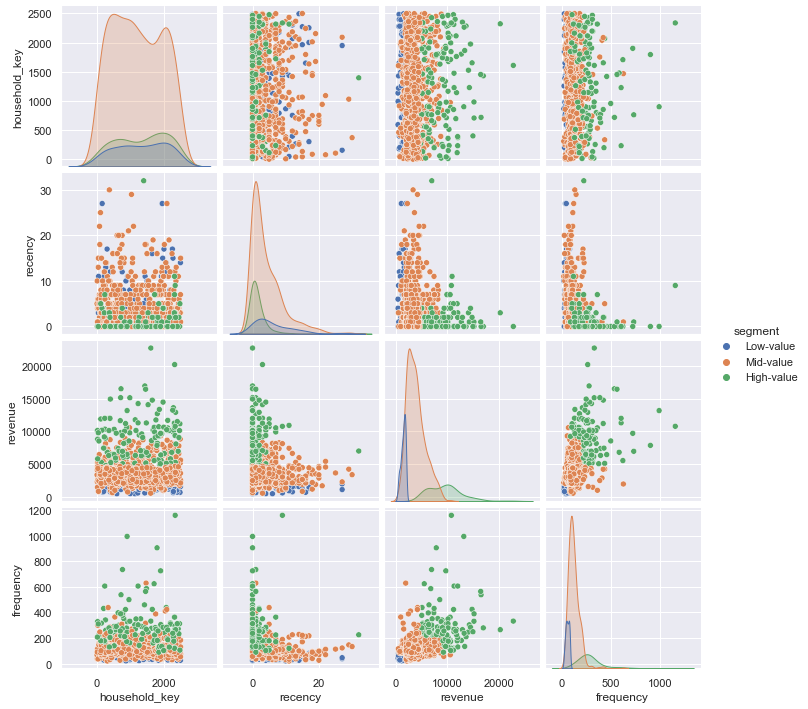

In [68]:
sns.pairplot(data=df_cus_segnment,hue='segment')

In [83]:
df_cus_segnment.groupby('segment').household_key.count()

segment
High-value    124
Low-value      91
Mid-value     586
Name: household_key, dtype: int64

In [70]:
df_cus_redeemed_camp18.store_id.unique()

array([  286, 31862,   297, 33923,   362,   367, 31742,   408,   442,
         316,   323,   429,   327,   388,   396,   361,   311,   406,
         381,   450,   292,   401,   382,   375,   289,   300,   436,
         439,   404, 31582,   356,   363,   321,   310,   421,   370,
         306,   320,   415,   365,   389,   304,   380,   438,   402,
         324,  3235,   334, 34011,   432,   447,   319, 31401,   422,
         338,   433,   318,   343,   296, 31642,   309,   412,   448,
         384,   410,   335,   333, 34007,   369,   322,   317,   441,
         372,   358,   368,   391,   346,   364,   330,   424,   403,
         400,   366, 31762, 31782,   337,   445,   339,   420,   427,
       32004,   293,   359,   443,   673,   295, 34280,   345,   299,
         313,   622,   715,  3327,   315,   329,  2761,   446,   669,
         340,   352,  2998,  3236,   355,  3479,  3131,  3517,   379,
        2950,  3060,  3179])

In [71]:
product_id_camp18 = df_cus_redeemed_camp18.product_id.unique()
product_id_camp18.shape

(14825,)